In [132]:
!pip3 install pickle5
import pickle5 as pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the 'C:\Users\nickh\anaconda3\envs\cm2\python.exe -m pip install --upgrade pip' command.


In [2]:
def load_pickle_file(fname):
    try:
        data = pd.read_pickle(fname)
    except:
        with open(fname, "rb") as fh:
            data = pickle.load(fh)
            data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    return data

In [10]:
# iemocap1 = load_pickle_file('iemocap_session1_af.pickle')
# iemocap2 = load_pickle_file('iemocap_session2_af.pickle')
# iemocap3 = load_pickle_file('iemocap_session3_af.pickle')
# iemocap4 = load_pickle_file('iemocap_session4_af.pickle')
# iemocap5 = load_pickle_file('iemocap_session5_af.pickle')

iemocap1 = pd.read_csv('iemocap_session1_af.csv')
iemocap1 = iemocap1.loc[:, ~iemocap1.columns.str.contains('^Unnamed')]
iemocap2 = pd.read_csv('iemocap_session2_af.csv')
iemocap2 = iemocap2.loc[:, ~iemocap2.columns.str.contains('^Unnamed')]
iemocap3 = pd.read_csv('iemocap_session3_af.csv')
iemocap3 = iemocap3.loc[:, ~iemocap3.columns.str.contains('^Unnamed')]
iemocap4 = pd.read_csv('iemocap_session4_af.csv')
iemocap4 = iemocap4.loc[:, ~iemocap4.columns.str.contains('^Unnamed')]
iemocap5 = pd.read_csv('iemocap_session5_af.csv')
iemocap5 = iemocap5.loc[:, ~iemocap5.columns.str.contains('^Unnamed')]

In [11]:
print(len(iemocap1))
print(len(iemocap2))
print(len(iemocap3))
print(len(iemocap4))
print(len(iemocap5))
len(iemocap1) + len(iemocap2) + len(iemocap3) + len(iemocap4) + len(iemocap5)

1819
1762
1760
1865
2170


9376

In [12]:
acoustic_feature_columns = [c for c in iemocap1.columns][5:]

In [13]:
iemocap1

,TURN,UTTERANCE,DA,EMOTION,audio_file,F0semitoneFrom27.5Hz_sma3nz_amean_b,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_b,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_b,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_b,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_b,...,slopeUV0-500_sma3nz_amean_e,slopeUV500-1500_sma3nz_amean_e,spectralFluxUV_sma3nz_amean_e,loudnessPeaksPerSec_e,VoicedSegmentsPerSec_e,MeanVoicedSegmentLengthSec_e,StddevVoicedSegmentLengthSec_e,MeanUnvoicedSegmentLength_e,StddevUnvoicedSegmentLength_e,equivalentSoundLevel_dBp_e
0,Ses01F_impro01_F000,Excuse me.,c,neu,Ses01F_impro01_F000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000731,0.002195,0.027680,1.587302,0.000000,0.000000,0.000000,0.570000,0.000000,-50.019608
1,Ses01F_impro01_M000,Do you have your forms?,q,fru,Ses01F_impro01_M000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.009739,0.005470,0.038869,1.052632,1.111111,0.270000,0.000000,0.610000,0.000000,-29.833280
2,Ses01F_impro01_F001,Yeah.,ans,neu,Ses01F_impro01_F001,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000152,0.001867,0.019451,8.888889,0.000000,0.000000,0.000000,0.390000,0.000000,-52.912780
3,Ses01F_impro01_M001,Let me see them.,s,fru,Ses01F_impro01_M001,26.122112,0.032891,26.099644,26.244362,26.424637,...,-0.008951,0.001008,0.029631,3.252032,0.000000,0.000000,0.000000,1.170000,0.000000,-49.143710
4,Ses01F_impro01_F002,Is there a problem?,q,neu,Ses01F_impro01_F002,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000056,-0.000669,0.037681,2.912622,3.061225,0.143333,0.004714,0.120000,0.123895,-32.468056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,Ses01M_script03_2_F040,This is the end do you hear me? Finally and f...,s,ang,Ses01M_script03_2_F040,32.384240,0.081119,30.534610,31.911644,33.069565,...,-0.005440,0.003610,0.087855,1.234568,1.273885,0.205000,0.175000,0.560000,0.520000,-18.378300
1815,Ses01M_script03_2_M041,You're not going like this.,c,ang,Ses01M_script03_2_M041,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000795,0.006013,0.083328,2.666667,1.428572,0.070000,0.000000,0.300000,0.080000,-34.489544
1816,Ses01M_script03_2_F041,Oh yes I am...Oh yes I am. Let go of me. You l...,o,ang,Ses01M_script03_2_F041,40.590290,0.169796,34.144410,40.024890,48.004020,...,0.016079,-0.004743,1.118974,2.702703,1.442308,0.491111,0.364583,0.203750,0.378118,-5.156447
1817,Ses01M_script03_2_M042,No you're not.,dag,ang,Ses01M_script03_2_M042,31.108418,0.012443,30.754486,30.995090,31.593002,...,0.022332,-0.017279,0.420517,3.571429,6.122449,0.110000,0.127279,0.033333,0.009428,-22.351753


In [14]:
# Get the DA labels
da_labels_iemocap1 = iemocap1['DA']
da_labels_iemocap2 = iemocap2['DA']
da_labels_iemocap3 = iemocap3['DA']
da_labels_iemocap4 = iemocap4['DA']
da_labels_iemocap5 = iemocap5['DA']

# Emotion labels
emot_labels_iemocap1 = iemocap1['EMOTION']
emot_labels_iemocap2 = iemocap2['EMOTION']
emot_labels_iemocap3 = iemocap3['EMOTION']
emot_labels_iemocap4 = iemocap4['EMOTION']
emot_labels_iemocap5 = iemocap5['EMOTION']

In [159]:
# Get a sense of the value counts for the data
full_da_labels = pd.concat([da_labels_iemocap1, da_labels_iemocap2, da_labels_iemocap3, da_labels_iemocap4, da_labels_iemocap5])
full_da_labels.value_counts()/len(full_da_labels)

s      0.231442
o      0.221096
q      0.207445
ans    0.152410
ag     0.053008
dag    0.039676
c      0.037329
b      0.030290
ap     0.007999
oth    0.007253
g      0.006293
a      0.005759
Name: DA, dtype: float64

In [161]:
len(full_da_labels)

9376

In [160]:
full_emot_data = pd.concat([emot_labels_iemocap1, emot_labels_iemocap2, emot_labels_iemocap3, emot_labels_iemocap4, emot_labels_iemocap5])
full_emot_data.value_counts()/len(full_emot_data)

xxx    0.245840
fru    0.182807
neu    0.172035
ang    0.110282
sad    0.107828
exc    0.106549
hap    0.060047
sur    0.010026
fea    0.004053
oth    0.000320
dis    0.000213
Name: EMOTION, dtype: float64

In [17]:
# Turn code into categorical data
# Create one hot embeddings of the label values (0, 1, 2)
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import numpy as np

# Full set of dialogue act labels
da_labels = ['s', 'q', 'o', 'ans', 'c', 'ag', 'b', 'dag', 'oth', 'a', 'ap', 'g']
da_encoder = preprocessing.LabelEncoder()
da_encoder.fit(da_labels)

emotion_labels = ['xxx', 'fru', 'neu', 'ang', 'sad', 'exc', 'hap', 'sur', 'fea', 'oth', 'dis']
emotion_encoder = preprocessing.LabelEncoder()
emotion_encoder.fit(emotion_labels)

def convert_da_labels_to_categorical(dialog_acts):
    num_labels = da_encoder.transform(dialog_acts)
    cat_labels = to_categorical(num_labels)
    return cat_labels

def convert_cat_da_to_string(cat_das):
    num_labels = np.argmax(cat_das, axis=-1)
    return da_encoder.inverse_transform(num_labels)

def convert_emot_labels_to_categorical(emot_data):
    num_labels = emotion_encoder.transform(emot_data)
    cat_labels = to_categorical(num_labels)
    return cat_labels

def convert_cat_emot_to_string(cat_emot_data):
    num_labels = np.argmax(cat_emot_data, axis=-1)
    return emotion_encoder.inverse_transform(num_labels)

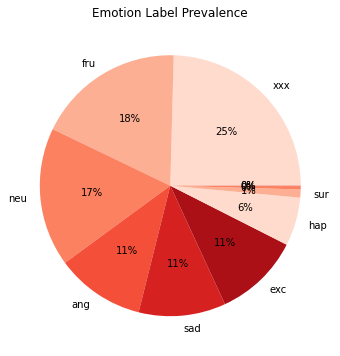

In [157]:
colors = sns.color_palette('Reds')[:len(emotion_labels)]
plt.pie(full_emot_data.value_counts(), labels = emotion_labels[:-3] + ['','',''], colors = colors, autopct='%.0f%%')
plt.title('Emotion Label Prevalence')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

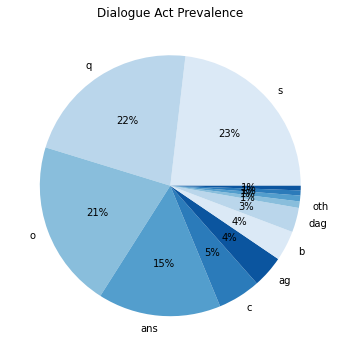

In [158]:
colors = sns.color_palette('Blues')[:len(da_labels)]
plt.pie(full_da_labels.value_counts(), labels = da_labels[:-3] + ['','',''], colors = colors, autopct='%.0f%%')
plt.title('Dialogue Act Prevalence')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [18]:
print(da_labels_iemocap1[0])
cat_1_labels = convert_da_labels_to_categorical(da_labels_iemocap1)
print(cat_1_labels[0])
string_das = convert_cat_da_to_string(cat_1_labels)
print(string_das[0])

print(emot_labels_iemocap1[0])
cat_1_emot_labels = convert_emot_labels_to_categorical(emot_labels_iemocap1)
print(cat_1_emot_labels[0])
string_emot = convert_cat_emot_to_string(cat_1_emot_labels)
print(string_emot[0])

c
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
c
neu
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
neu


In [19]:
X = iemocap2[acoustic_feature_columns].to_numpy()
y_da = convert_da_labels_to_categorical(iemocap2['DA'])
y_emot = convert_emot_labels_to_categorical(iemocap2['EMOTION'])

In [115]:
from keras import layers, Input, Model, Sequential
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_and_train_model(X, y_da):
    callback = EarlyStopping(monitor='loss', patience=5)
    model = Sequential()
    model.add(layers.Dense(256, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(y_da[0]), activation="softmax"))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X, y_da, batch_size=32, epochs=100, validation_split=0.2, callbacks=[callback])
    return (model, history)

In [116]:
build_and_train_model(X, y_da)

Epoch 1/100
189/189 [==============================] - 0s 2ms/step - loss: 59.8198 - accuracy: 0.1907 - val_loss: 22.0424 - val_accuracy: 0.2024
Epoch 2/100
189/189 [==============================] - 0s 1ms/step - loss: 9.1737 - accuracy: 0.2031 - val_loss: 10.9584 - val_accuracy: 0.2302
Epoch 3/100
189/189 [==============================] - 0s 1ms/step - loss: 3.2471 - accuracy: 0.2362 - val_loss: 6.1920 - val_accuracy: 0.2063
Epoch 4/100
189/189 [==============================] - 0s 1ms/step - loss: 2.3712 - accuracy: 0.2419 - val_loss: 2.4951 - val_accuracy: 0.2057
Epoch 5/100
189/189 [==============================] - 0s 1ms/step - loss: 2.1775 - accuracy: 0.2427 - val_loss: 2.4093 - val_accuracy: 0.2070
Epoch 6/100
189/189 [==============================] - 0s 1ms/step - loss: 2.1049 - accuracy: 0.2450 - val_loss: 2.3262 - val_accuracy: 0.2063
Epoch 7/100
189/189 [==============================] - 0s 1ms/step - loss: 2.0637 - accuracy: 0.2452 - val_loss: 3.3158 - val_accuracy: 0.2

(<keras.engine.sequential.Sequential at 0x2af899e0888>,
 <keras.callbacks.History at 0x2af899ead08>)

In [83]:
preds = model1.predict(X)

#preds = [np.argmax(pred) for pred in preds]
#pd.DataFrame(data=np.array(preds)).value_counts()

np.argmax(preds, axis=-1)

array([6, 8, 6, ..., 0, 2, 2], dtype=int64)

In [24]:
X.shape

(1762, 264)

In [27]:
# create train/test fold assignments

tr1 = pd.concat([iemocap1, iemocap2, iemocap3, iemocap4])
te1 = iemocap5

tr2 = pd.concat([iemocap1, iemocap2, iemocap3, iemocap5])
te2 = iemocap4

tr3 = pd.concat([iemocap1, iemocap2, iemocap4, iemocap5])
te3 = iemocap3

tr4 = pd.concat([iemocap1, iemocap3, iemocap4, iemocap5])
te4 = iemocap2

tr5 = pd.concat([iemocap2, iemocap3, iemocap4, iemocap5])
te5 = iemocap1

splits = [(tr1, te1), (tr2, te2), (tr3, te3), (tr4, te4), (tr5, te5)]

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

y_true = []
y_pred = []

for s in splits:
    tr, te = s
    X_train = tr[acoustic_feature_columns].to_numpy()
    y_train = convert_da_labels_to_categorical(tr['DA'])
    X_test = te[acoustic_feature_columns].to_numpy()
    y_test = convert_da_labels_to_categorical(te['DA'])
    model, history = build_and_train_model(X_train, y_train)
    
    preds = np.argmax(model.predict(X_test), axis=1)
    y_uni = np.argmax(y_test, axis=1)
    
    y_pred += preds.tolist()
    y_true += y_uni.tolist()
    
    p = precision_score(y_uni, preds, average='micro')
    r = recall_score(y_uni, preds, average='micro')
    f1 = f1_score(y_uni, preds, average='micro')
    
    precision_scores.append(p)
    recall_scores.append(r)
    f1_scores.append(f1)

Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 56.2348 - accuracy: 0.1855 - val_loss: 8.7620 - val_accuracy: 0.2254
Epoch 2/100
181/181 [==============================] - 0s 1ms/step - loss: 4.8024 - accuracy: 0.2071 - val_loss: 3.4275 - val_accuracy: 0.2469
Epoch 3/100
181/181 [==============================] - 0s 1ms/step - loss: 2.6345 - accuracy: 0.2361 - val_loss: 3.0733 - val_accuracy: 0.2476
Epoch 4/100
181/181 [==============================] - 0s 1ms/step - loss: 2.2679 - accuracy: 0.2403 - val_loss: 2.9988 - val_accuracy: 0.2483
Epoch 5/100
181/181 [==============================] - 0s 1ms/step - loss: 2.1879 - accuracy: 0.2380 - val_loss: 2.8970 - val_accuracy: 0.2476
Epoch 6/100
181/181 [==============================] - 0s 1ms/step - loss: 2.1224 - accuracy: 0.2384 - val_loss: 2.8514 - val_accuracy: 0.2476
Epoch 7/100
181/181 [==============================] - 0s 1ms/step - loss: 2.0709 - accuracy: 0.2387 - val_loss: 2.7076 - val_accuracy: 0.248

Epoch 33/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9556 - accuracy: 0.2327 - val_loss: 2.4574 - val_accuracy: 0.2063
Epoch 34/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9552 - accuracy: 0.2329 - val_loss: 2.5865 - val_accuracy: 0.2063
Epoch 35/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9561 - accuracy: 0.2329 - val_loss: 2.2540 - val_accuracy: 0.2063
Epoch 36/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9569 - accuracy: 0.2332 - val_loss: 2.5273 - val_accuracy: 0.2063
Epoch 37/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9568 - accuracy: 0.2329 - val_loss: 2.5686 - val_accuracy: 0.2063
Epoch 38/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9561 - accuracy: 0.2327 - val_loss: 2.5658 - val_accuracy: 0.2063
Epoch 39/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9577 - accuracy: 0.2325 - val_loss: 2.4997 - val_accuracy:

Epoch 24/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9960 - accuracy: 0.2384 - val_loss: 6.5588 - val_accuracy: 0.2055
Epoch 25/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9291 - accuracy: 0.2387 - val_loss: 6.7068 - val_accuracy: 0.2055
Epoch 26/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9267 - accuracy: 0.2381 - val_loss: 3.7629 - val_accuracy: 0.2068
Epoch 27/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9268 - accuracy: 0.2384 - val_loss: 4.8065 - val_accuracy: 0.2068
Epoch 28/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9235 - accuracy: 0.2382 - val_loss: 4.2733 - val_accuracy: 0.2068
Epoch 29/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9255 - accuracy: 0.2384 - val_loss: 5.3274 - val_accuracy: 0.2068
Epoch 30/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9240 - accuracy: 0.2385 - val_loss: 5.3188 - val_accuracy:

In [101]:
results = pd.DataFrame(data=zip(precision_scores, recall_scores, f1_scores), columns=['Precision', 'Recall', 'F1'])
results

,Precision,Recall,F1
0,0.205991,0.205991,0.205991
1,0.251475,0.251475,0.251475
2,0.236932,0.236932,0.236932
3,0.242338,0.242338,0.242338
4,0.224299,0.224299,0.224299


In [91]:
results.describe()

,Precision,Recall,F1
count,5.000000,5.000000,5.000000
mean,0.247325,0.247325,0.247325
std,0.025091,0.025091,0.025091
min,0.205991,0.205991,0.205991
25%,0.242441,0.242441,0.242441
50%,0.257094,0.257094,0.257094
75%,0.261932,0.261932,0.261932
max,0.269169,0.269169,0.269169


In [105]:
from sklearn.metrics import classification_report, confusion_matrix

cr = classification_report(y_true, y_pred)
print(cr)

cm = confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.00      0.00      0.00       497
           2       0.18      0.00      0.00      1429
           3       0.00      0.00      0.00        75
           4       0.00      0.00      0.00       284
           5       0.00      0.00      0.00       350
           6       0.00      0.00      0.00       372
           7       0.00      0.00      0.00        59
           8       0.08      0.00      0.00      2073
           9       0.17      0.04      0.07        68
          10       0.11      0.00      0.00      1945
          11       0.23      0.99      0.38      2170

    accuracy                           0.23      9376
   macro avg       0.06      0.09      0.04      9376
weighted avg       0.12      0.23      0.09      9376



C:\Users\nickh\anaconda3\envs\cm2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nickh\anaconda3\envs\cm2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nickh\anaconda3\envs\cm2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


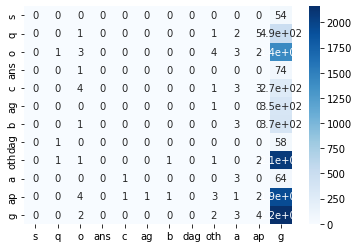

In [106]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index=da_labels, columns=da_labels)

ax = sn.heatmap(df_cm, cmap='Blues', annot=True)

In [122]:
y_true_cat = convert_cat_da_to_string(np.array(y_true).reshape(-1, 1))
pd.DataFrame(y_true).value_counts()

11    2170
8     2073
10    1945
2     1429
1      497
6      372
5      350
4      284
3       75
9       68
7       59
0       54
dtype: int64

In [110]:
pd.DataFrame(y_pred).value_counts()

11    9302
9       18
10      18
2       17
8       13
1        3
4        2
6        2
5        1
dtype: int64

In [171]:
len(preds[0])

128

In [181]:
res = []

for s in splits:
    tr, te = s
    X_train = tr[acoustic_feature_columns].to_numpy()
    y_train = convert_da_labels_to_categorical(tr['DA'])
    X_test = te[acoustic_feature_columns].to_numpy()
    y_test = convert_da_labels_to_categorical(te['DA'])
    model, history = build_and_train_model(X_train, y_train)
    
    model_pen = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    
    preds = model_pen.predict(X_test)
    df = pd.DataFrame(zip(te['audio_file'], preds), columns=['audio_file', 'acoustic_embedding'])
    res.append(df)

final_embeds = pd.concat(res)

Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 52.2749 - accuracy: 0.1875 - val_loss: 10.8033 - val_accuracy: 0.2198
Epoch 2/100
181/181 [==============================] - 0s 1ms/step - loss: 7.8955 - accuracy: 0.1947 - val_loss: 3.5050 - val_accuracy: 0.2261
Epoch 3/100
181/181 [==============================] - 0s 1ms/step - loss: 2.6506 - accuracy: 0.2217 - val_loss: 3.1213 - val_accuracy: 0.2240
Epoch 4/100
181/181 [==============================] - 0s 1ms/step - loss: 2.3012 - accuracy: 0.2235 - val_loss: 2.9171 - val_accuracy: 0.2226
Epoch 5/100
181/181 [==============================] - 0s 1ms/step - loss: 2.1950 - accuracy: 0.2177 - val_loss: 2.8324 - val_accuracy: 0.2247
Epoch 6/100
181/181 [==============================] - 0s 1ms/step - loss: 2.1014 - accuracy: 0.2368 - val_loss: 2.7291 - val_accuracy: 0.2483
Epoch 7/100
181/181 [==============================] - 0s 1ms/step - loss: 2.0656 - accuracy: 0.2398 - val_loss: 2.7256 - val_accuracy: 0.24

Epoch 6/100
191/191 [==============================] - 0s 1ms/step - loss: 2.0916 - accuracy: 0.2398 - val_loss: 22.4530 - val_accuracy: 0.2073
Epoch 7/100
191/191 [==============================] - 0s 1ms/step - loss: 2.0651 - accuracy: 0.2395 - val_loss: 29.1552 - val_accuracy: 0.2054
Epoch 8/100
191/191 [==============================] - 0s 1ms/step - loss: 2.0231 - accuracy: 0.2400 - val_loss: 28.0181 - val_accuracy: 0.2060
Epoch 9/100
191/191 [==============================] - 0s 1ms/step - loss: 2.0018 - accuracy: 0.2387 - val_loss: 28.6063 - val_accuracy: 0.2054
Epoch 10/100
191/191 [==============================] - 0s 1ms/step - loss: 2.0127 - accuracy: 0.2387 - val_loss: 26.0461 - val_accuracy: 0.2054
Epoch 11/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9822 - accuracy: 0.2375 - val_loss: 27.7468 - val_accuracy: 0.2060
Epoch 12/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9672 - accuracy: 0.2402 - val_loss: 26.3119 - val_accura

189/189 [==============================] - 0s 1ms/step - loss: 1.9540 - accuracy: 0.2609 - val_loss: 48.8806 - val_accuracy: 0.2394
Epoch 12/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9560 - accuracy: 0.2609 - val_loss: 47.2596 - val_accuracy: 0.2374
Epoch 13/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9426 - accuracy: 0.2627 - val_loss: 47.0550 - val_accuracy: 0.2427
Epoch 14/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9218 - accuracy: 0.2625 - val_loss: 46.1338 - val_accuracy: 0.2381
Epoch 15/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9245 - accuracy: 0.2627 - val_loss: 45.3006 - val_accuracy: 0.2388
Epoch 16/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9168 - accuracy: 0.2577 - val_loss: 41.7790 - val_accuracy: 0.2401
Epoch 17/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9049 - accuracy: 0.2615 - val_loss: 39.5419 - val_accuracy: 0.242

In [182]:
final_embeds

,audio_file,acoustic_embedding
0,Ses05F_impro01_F000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Ses05F_impro01_M000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Ses05F_impro01_F001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Ses05F_impro01_M001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Ses05F_impro01_F002,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
1814,Ses01M_script03_2_F040,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.16957296, 0.0, 0.0..."
1815,Ses01M_script03_2_M041,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.16957296, 0.0, 0.0..."
1816,Ses01M_script03_2_F041,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.16957296, 0.0, 0.0..."
1817,Ses01M_script03_2_M042,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.16957296, 0.0, 0.0..."


In [183]:
final_embeds.to_csv('acoustic_embeddings.csv')